In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import MiniBatchKMeans,AffinityPropagation
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.manifold import TSNE
from scipy.stats import kurtosis,skew
from scipy.fftpack import rfft
from sklearn.preprocessing import minmax_scale

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsupervised-learning-m2023/Train.csv
/kaggle/input/unsupervised-learning-m2023/Test.csv


In [2]:
Df_train = pd.read_csv('/kaggle/input/unsupervised-learning-m2023/Train.csv')
Df_train.head(10)
Df_test = pd.read_csv('/kaggle/input/unsupervised-learning-m2023/Test.csv')
nx,ny = Df_test.shape
print(nx,ny)
print(Df_train.head(10))
lb = LabelEncoder()
lb.fit(Df_train['Sensor'])
Df_train['Sensor'] = lb.transform(Df_train['Sensor'])
Df_test['Sensor'] = lb.transform(Df_test['Sensor'])
Df_test.head(10)

68400 127
          0         1         2         3         4         5         6  \
0  8.130500  8.130500  8.160400  8.160300  8.160500  8.145400  8.145400   
1  1.034900  1.020200  1.020100  1.005200  1.027500  1.020100  1.049500   
2  5.421700  5.384300  5.362200  5.377000  5.347300  5.391900  5.451800   
3 -0.009461 -0.009368  0.015046  0.006892  0.008811  0.007001 -0.005710   
4  0.001915  0.023485  0.014330  0.018045  0.030433  0.029523  0.014217   
5 -0.003424  0.001953  0.000204  0.005649 -0.005346 -0.008080 -0.021708   
6 -0.787120 -0.787170 -0.786640 -0.785290 -0.787420 -0.787160 -0.787200   
7 -0.069654 -0.068275 -0.068277 -0.069849 -0.068796 -0.070603 -0.067744   
8  0.157300  0.158900  0.158790  0.159120  0.159160  0.159050  0.158360   
9  0.700970  0.718290  0.698490  0.727990  0.715720  0.713230  0.718130   

          7         8         9  ...      6242      6243      6244      6245  \
0  8.137600  8.130700  8.115500  ...  7.846600  7.846700  7.802100  7.839200   
1  0

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,Sensor,ID
0,-0.005553,-0.005555,-0.001927,0.00362,-0.000057,-0.016367,-0.000747,-0.009958,-0.016365,-0.01098,...,0.025315,0.004389,0.003512,0.004473,-0.001946,0.010838,-0.012944,-0.015867,43,11435
1,-0.506510,-0.503990,-0.509880,-0.51366,-0.516020,-0.521940,-0.519750,-0.512000,-0.504350,-0.49535,...,-0.502250,-0.506890,-0.507520,-0.502950,-0.498900,-0.495870,-0.493780,-0.490370,8,44936
2,1.129800,1.299100,1.307800,1.03980,0.574590,0.116000,-0.169270,-0.109780,-0.094517,-0.26583,...,0.503220,0.929130,0.997340,1.140400,1.022900,0.596410,0.047012,0.103940,28,48630
3,-1.000500,-0.993640,-1.015500,-0.95595,-0.971360,-0.986350,-0.926550,-1.030600,-0.941640,-0.86113,...,-0.882290,-1.045300,-0.897400,-0.941900,-1.105600,-0.867400,-1.037300,-0.926990,39,496
4,-0.774860,-0.752180,-0.711310,-0.65723,-0.621070,-0.587910,-0.541140,-0.483030,-0.423670,-0.38125,...,-0.507830,-0.466720,-0.427060,-0.388320,-0.363050,-0.342670,-0.366050,-0.425750,32,33154
5,6.629800,5.878300,6.144500,6.74080,6.734700,8.078100,4.962400,6.394700,6.706800,6.41340,...,7.057400,6.962900,2.624200,5.269100,6.649700,6.148800,7.061400,7.619900,24,51086
6,-0.647090,-0.661860,-0.673490,-0.68712,-0.675760,-0.637720,-0.551670,-0.483030,-0.527450,-0.63556,...,-0.660210,-0.625050,-0.580080,-0.488360,-0.393860,-0.441180,-0.536870,-0.631860,23,41056
7,3.391600,1.965500,0.176420,-1.28060,-1.730900,-0.094518,0.411620,1.127700,0.724320,1.18380,...,1.280400,1.900400,2.453400,1.761200,2.373700,2.751900,2.006500,0.135320,42,37667
8,-0.483860,-0.437600,-0.351190,0.13422,0.704430,0.917350,1.574300,1.754800,1.793600,1.87300,...,-1.323800,-1.064800,-1.013700,-0.994030,-0.960120,-1.002100,-0.984520,-0.944180,34,15737
9,0.232000,-0.021840,-0.137090,0.18518,0.618350,0.186010,0.146190,0.376200,0.103490,-0.19429,...,-0.099570,0.222440,-0.068876,0.029488,0.032514,-0.024038,-0.018378,-0.169220,1,38856


In [3]:
Df_train['Action_Person'].unique()
len(Df_test['ID'].unique())

68400

In [4]:
Df_train.isnull().sum()
Df_test.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
122       0
123       0
124       0
Sensor    0
ID        0
Length: 127, dtype: int64

In [5]:
from scipy.fft import fft,rfft
m1 = Df_train.iloc[:,:-2]# excluding last 2 columns
m2 = Df_test.iloc[:,:-2]
m3 = Df_train['Action_Person'].tolist()
dict2 = {}
l4 = Df_train['Action_Person'].tolist()
l5 = Df_train['Sensor'].tolist()
l6 = Df_test['Sensor'].tolist()
m6 =  np.repeat(np.array(l5),150)
cnt = 0
for j in l4:
    if (j in dict2):
        continue
    else:
        dict2[j] = cnt
        cnt = cnt+1
data_arr = np.array(m1)
test_arr = np.array(m2)
p1 = np.array(m1)
p2 = np.array(m2)
data5_arr = np.empty((342000,125))
cnt1 = 0
for j in p1:
    for i in range(0,len(j),125):
        data5_arr[cnt1] = j[i:i+125]
        cnt1+=1
print(data5_arr.shape)
m3 = np.repeat(m3,150) 
# for i,j in enumerate(data_arr):
#     n = len(j)
#     fx = np.fft.fft(np.array(j),n)
#     psd = fx*np.conj(fx)/n
#     _msk = psd > 0.1
#     fx = _msk * fx
#     ndata = np.fft.ifft(fx)
#     data_arr[i] = np.array(ndata)
# print(data_arr.shape)
# pd1 = pd.DataFrame(data_arr)
# pd1.head(10)
# print(test_arr.shape)
# data1_arr = np.empty((342000,139))
# for i,j in enumerate(data5_arr):
#     f1 = np.mean(j)
#     f2 = np.std(j)
#     f3 = kurtosis(j)
#     f6 = skew(j)
#     m1 = np.correlate(j,j,mode='full')
#     q = m1.size//2
#     m2 = m1[q:]
#     f4 = m2[0:10].tolist()
# #     f5 = np.sort(np.real(np.fft.rfft(j)))[::-1][:5].tolist()
#     f5 = []
#     f5.extend([f1,f2,f6,f3])
#     f5.extend(f4)
#     j = np.concatenate((data5_arr[i],np.array(f5)))
#     data1_arr[i] = j;
#     j = j.tolist()
#     f1 = []
#     for x in range(0,len(j)-124,125):
#         q1 = j[x:x+125]
#         q2 = fft(q1)
#         q2 = np.abs(q2)
#         f1.extend(q2)
#     data1_arr[i] = np.array(f1)
# data2_arr = np.empty((342000,129))
# for i,j in enumerate(p2):
#     f1 = np.mean(j)
#     f2 = np.std(j)
#     f3 = kurtosis(j)
#     f6 = skew(j)   
#     f5 = []
#     f5.extend([f1,f2,f6,f3])
#     j = np.concatenate((test_arr[i],np.array(f5)))
#     f5 = np.sort(np.real(np.fft.rfft(j)))[::-1][:5].tolist()
#     m1 = np.correlate(j,j,mode='full')
#     q = m1.size//2
#     m2 = m1[q:]
#     f4 = m2[0:10].tolist()
#     data2_arr[i] = f5;
#     j = j.tolist()
#     q1 = fft(j)
#     q1 = np.abs(q1)
#     data2_arr[i] = np.array(q1)
# data3_arr = np.empty((68400,12))
# for i,j in enumerate(data1_arr):
#     f1 = np.mean(j)
#     f2 = np.std(j)
#     f3 = kurtosis(j)
#     f6 = skew(j)
# #     m1 = np.correlate(j,j,mode='full')
# #     q = m1.size//2
# #     m2 = m1[q:]
# #     f4 = m2[0:10].tolist()
# # #     f5 = np.sort(np.real(np.fft.rfft(j)))[::-1][:5].tolist()
#     f5 = []
#     f5.extend([f1,f2,f6,f3])
# #     f5.extend(f4)
# #     print(len(j))
#     j = np.concatenate((j,np.array(f5)))
#     data3_arr[i] = j;
# data4_arr = np.empty((68400,4))
# for i,j in enumerate(data2_arr):
#     f1 = np.mean(j)
#     f2 = np.std(j)
#     f3 = kurtosis(j)
#     f6 = skew(j)
# #     m1 = np.correlate(j,j,mode='full')
# #     q = m1.size//2
# #     m2 = m1[q:]
# #     f4 = m2[0:10].tolist()
# # #     f5 = np.sort(np.real(np.fft.rfft(j)))[::-1][:5].tolist()
#     f5 = []
#     f5.extend([f1,f2,f6,f3])
# #     f5.extend(f4)
# # #     j = np.concatenate((test_arr[i],np.array(f5)))
# #     data2_arr[i] = f5;
#     data4_arr[i] = np.array(f5)
# data_mod_arr = []
# for i in range(0,125,25):
#     sc = i;
#     ec = min(i+25,125)
#     new_data = data5_arr[:,sc:ec]
#     new_data_mean = np.mean(new_data,axis=1)
#     data_mod_arr.append(new_data_mean)
# data_arr = np.array(data_mod_arr).T
# data_mod_arr1 = []
# for i in range(0,125,25):
#     sc = i;
#     ec = min(i+25,125)
#     new_data = test_arr[:,sc:ec]
#     new_data_mean = np.mean(new_data,axis=1)
#     data_mod_arr1.append(new_data_mean)
# test_arr = np.array(data_mod_arr1).T
# data_arr = data5_arr
# print(data_arr)
# print(test_arr)
# test_arr = p2
pd1 = pd.DataFrame(data5_arr)
pd1.head(10)

(342000, 125)


,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,8.1305,8.1305,8.1604,8.1603,8.1605,8.1454,8.1454,8.1376,8.1307,8.1155,...,7.9664,7.9664,7.9515,7.9292,7.9367,7.9515,7.9442,7.9517,7.9743,7.9812
1,7.9665,7.9516,7.9889,7.9367,7.9365,7.9516,7.9515,7.9290,7.9290,7.9364,...,7.8918,7.9211,7.9214,7.8619,7.9512,7.9290,7.9067,7.9364,7.9067,7.8991
2,7.8917,7.9065,7.8692,7.8917,7.8991,7.9366,7.8917,7.9068,7.9213,7.9140,...,7.9589,7.9516,7.9663,7.9216,7.9216,7.9289,7.9290,7.9216,7.9439,7.9588
3,7.9366,7.9665,7.9067,7.9218,7.9512,7.9291,7.9068,7.9439,7.9217,7.9216,...,7.9068,7.9216,7.9066,7.9217,7.9219,8.0711,8.0104,7.7576,7.6901,7.8090
4,7.8913,7.8696,7.8622,7.8920,7.9068,7.9369,7.9743,8.0113,7.9821,7.9287,...,7.9215,7.9515,7.9665,7.9665,7.9964,7.9065,7.9369,8.0559,8.1305,8.0486
5,8.0411,8.1009,8.0859,8.0710,8.0708,8.0709,8.0708,8.0708,8.0709,8.0560,...,7.9664,8.0114,8.0854,7.9813,7.9963,8.0259,8.0184,7.9962,7.9514,7.9662
6,7.9589,7.9587,7.9513,7.9663,7.9661,7.9586,7.9364,7.9513,7.9215,7.9512,...,7.8914,7.8618,7.8767,7.9065,7.9065,7.9218,7.8916,7.9065,7.8990,7.9214
7,7.8991,7.8991,7.8917,7.8990,7.8765,7.8468,7.9063,7.8542,7.8765,7.8766,...,7.9665,7.9517,8.0408,8.0111,7.9665,7.9663,8.0257,7.9959,7.9513,7.9961
8,8.0483,8.0257,8.0108,7.9959,7.9220,7.9963,8.0110,7.9517,7.9665,8.0113,...,7.9366,7.9364,7.9369,7.9065,7.9065,7.9213,7.9215,7.9067,7.8990,7.8991
9,7.9215,7.8618,7.8914,7.8915,7.8618,7.8768,7.8767,7.8917,7.9062,7.8916,...,7.9066,7.9218,7.8991,7.8770,7.9662,7.9662,7.8918,7.9513,7.9662,7.9290


,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,-0.004399,-0.004925,-0.005550,-0.006280,-0.007051,-0.007885,-0.008545,-0.009001,-0.009381,-0.009616,...,-0.001668,-0.002645,-0.003694,-0.004553,-0.005219,-0.005773,-0.006147,-0.006543,-0.006966,-0.007253
1,-0.508987,-0.508359,-0.507619,-0.506760,-0.505850,-0.504865,-0.504235,-0.504008,-0.503967,-0.504237,...,-0.484986,-0.485541,-0.486256,-0.486729,-0.486901,-0.487015,-0.486950,-0.486898,-0.486875,-0.486680
2,1.099167,1.030675,0.918355,0.766054,0.552057,0.271622,0.100593,0.048444,0.025253,0.076316,...,-0.135259,0.144964,0.538360,0.738822,0.732278,0.674692,0.488520,0.358414,0.302290,0.176346
3,-0.979618,-0.977630,-0.975283,-0.972551,-0.969674,-0.966573,-0.963820,-0.961495,-0.959268,-0.957308,...,-0.965729,-0.963106,-0.960057,-0.957896,-0.956818,-0.956035,-0.955934,-0.955907,-0.955899,-0.956565
4,-0.623076,-0.601940,-0.576855,-0.547514,-0.516605,-0.483237,-0.460243,-0.449176,-0.443343,-0.446501,...,-0.557360,-0.530946,-0.502591,-0.479666,-0.463935,-0.449839,-0.439748,-0.431727,-0.425450,-0.424071
5,6.576001,6.485397,6.440279,6.367846,6.717654,7.547381,5.449704,6.844478,6.580431,6.507216,...,6.434103,6.522994,7.148661,6.702163,3.787582,5.568453,6.679170,6.571199,6.980340,7.078051
6,-0.668119,-0.669350,-0.670850,-0.672644,-0.674514,-0.676529,-0.678240,-0.679578,-0.680808,-0.681796,...,-0.622267,-0.617532,-0.612445,-0.608367,-0.605487,-0.603041,-0.601433,-0.599994,-0.598679,-0.598190
7,2.832725,1.453922,0.237338,-1.101066,-1.206301,0.321414,0.898469,0.854265,1.061861,1.129954,...,0.421876,0.806745,1.481968,1.874563,2.059832,1.960437,2.010800,1.845623,1.656823,0.678727
8,-0.208673,-0.053487,0.154000,0.395681,0.756579,1.232079,1.528139,1.634895,1.693077,1.628785,...,-1.133215,-1.158165,-0.993877,-0.968513,-1.069321,-1.114176,-1.169597,-1.187299,-1.148533,-1.123755
9,0.092407,0.079910,0.063405,0.042214,0.021530,-0.000163,-0.024684,-0.051657,-0.081359,-0.114184,...,-0.027911,-0.023359,-0.015329,-0.012966,-0.014043,-0.019428,-0.030875,-0.037340,-0.038828,-0.042204


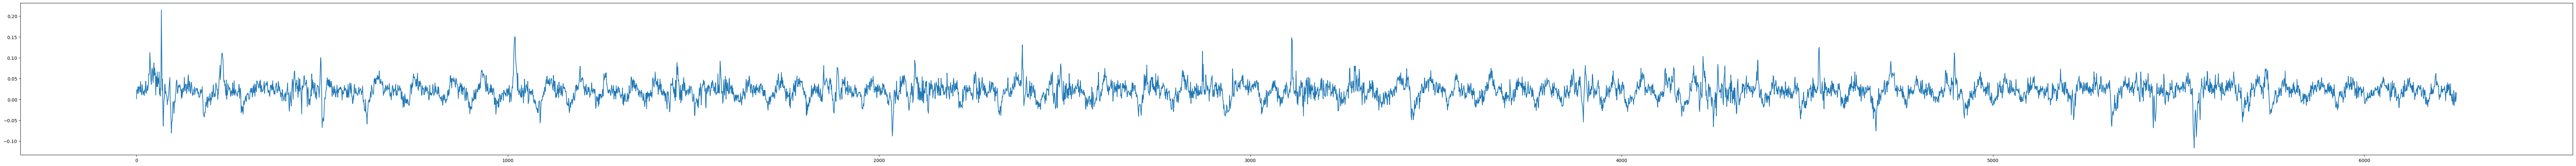

In [6]:
# Denoising 
from scipy.fft import fft,rfft
import pywt
p1 = Df_train.iloc[4].tolist()
p1 = p1[:-2]
p1 = np.array(p1)
plt.figure(figsize=(100,6))
plt.plot(p1)
data3_arr = np.empty((342000,125))
for i,j in enumerate(data5_arr):
    cf = pywt.wavedec(j,'db4',level=4)
    for x in range(1,len(cf)):
        cf[x] = pywt.threshold(cf[x],0.5,mode='soft')
    data3_arr[i] = pywt.waverec(cf,'db4')[:125];
data4_arr = np.empty((68400,125))
for i,j in enumerate(test_arr):
    cf = pywt.wavedec(j,'db4',level=4)
    for x in range(1,len(cf)):
        cf[x] = pywt.threshold(cf[x],0.5,mode='soft')
    data4_arr[i] = pywt.waverec(cf,'db4')[:125];
pd1 = pd.DataFrame(data4_arr)
pd1.head(10)


In [7]:
#testing for merger of waverec and orignial
l1 = [[1,2],[3,4],[5,6]]
l2 = [[3,4],[5,6],[7,8]]
l1 = np.array(l1)
l2 = np.array(l2)
l3 = [y for x in zip(l1, l2) for y in x]
print(l3)

[array([1, 2]), array([3, 4]), array([3, 4]), array([5, 6]), array([5, 6]), array([7, 8])]


6250


,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,8.163297,8.154059,8.146608,8.140735,8.136244,8.132951,8.130684,8.129284,8.128602,8.128498,...,7.983048,7.981128,7.978442,7.974974,7.970714,7.965653,7.959789,7.953123,7.945661,7.937413
1,7.964468,7.960995,7.957678,7.954485,7.951391,7.948374,7.945415,7.942501,7.939620,7.936762,...,7.917717,7.911604,7.906657,7.903055,7.900991,7.900667,7.902297,7.906110,7.912346,7.921259
2,7.892972,7.897405,7.900755,7.903173,7.904802,7.905770,7.906198,7.906196,7.905864,7.905295,...,7.959808,7.958490,7.956561,7.953904,7.950391,7.945882,7.940229,7.933270,7.924833,7.914734
3,7.953716,7.944687,7.936982,7.930516,7.925205,7.920968,7.917725,7.915401,7.913922,7.913217,...,7.914127,7.909107,7.902986,7.895657,7.887006,7.876916,7.865262,7.851913,7.836735,7.819586
4,7.886411,7.896955,7.906120,7.914003,7.920700,7.926302,7.930895,7.934563,7.937383,7.939432,...,7.940116,7.948393,7.957587,7.967757,7.978964,7.991270,8.004740,8.019440,8.035440,8.052810
5,8.046344,8.058550,8.068362,8.076007,8.081692,8.085617,8.087965,8.088909,8.088610,8.087219,...,8.024136,8.024332,8.023243,8.020698,8.016513,8.010494,8.002429,7.992098,7.979264,7.963675
6,7.991734,7.977101,7.964537,7.953832,7.944789,7.937225,7.930970,7.925865,7.921763,7.918531,...,7.898427,7.895255,7.892961,7.891714,7.891693,7.893093,7.896121,7.901001,7.907971,7.917285
7,7.929511,7.911405,7.896396,7.884224,7.874646,7.867429,7.862350,7.859201,7.857783,7.857908,...,8.004240,8.003814,8.002585,8.000496,7.997490,7.993509,7.988496,7.982393,7.975143,7.966690
8,8.022459,8.022396,8.021075,8.018608,8.015099,8.010650,8.005358,7.999314,7.992605,7.985315,...,7.956777,7.950160,7.942792,7.934642,7.925674,7.915855,7.905148,7.893514,7.880913,7.867303
9,7.883805,7.888270,7.891229,7.892886,7.893433,7.893046,7.891888,7.890110,7.887848,7.885229,...,7.911156,7.916497,7.921447,7.925866,7.929599,7.932480,7.934328,7.934948,7.934129,7.931646


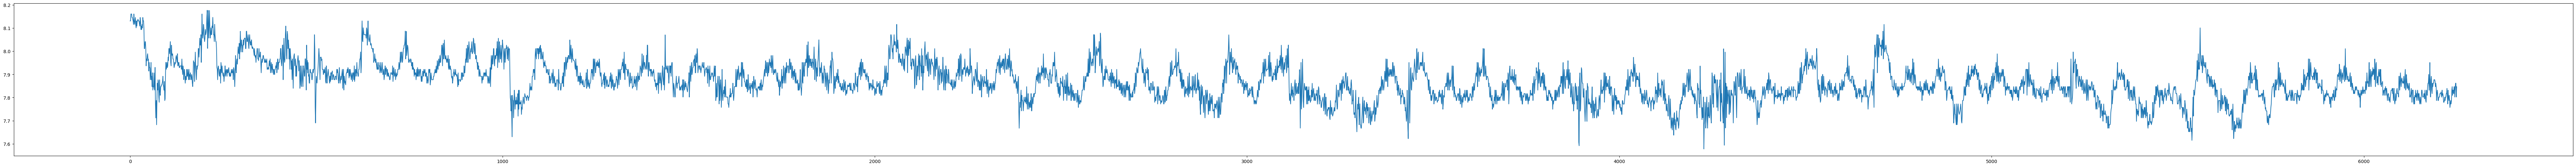

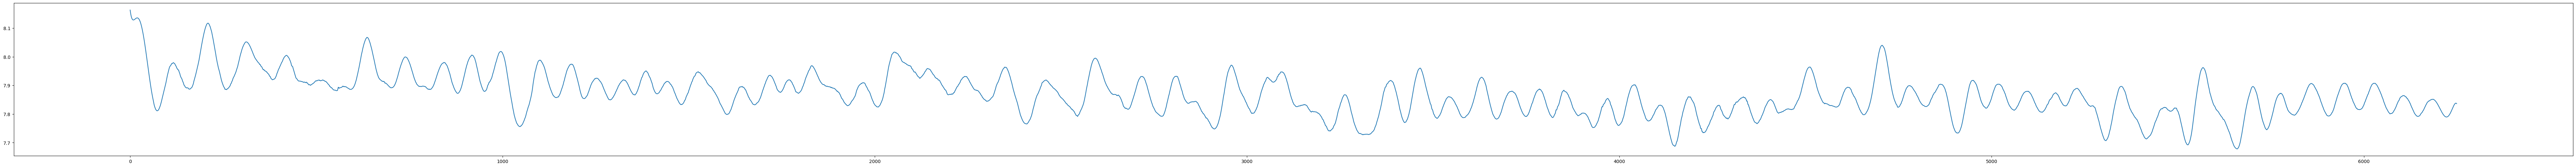

In [8]:
#now I got the realtion even more data to be added
from scipy.signal import savgol_filter
p1 = Df_train.iloc[0].tolist()
p1 = p1[:-2]
plt.figure(figsize=(100,6))
plt.plot(p1)
p1 = np.array(p1)
p2 = savgol_filter(p1,125, 6)
plt.figure(figsize=(100,6))
plt.plot(p2)
print(len((p2)))
data8_arr = np.empty((342000,125))
for i,j in enumerate(data5_arr):
    p2 = savgol_filter(j,125,6) # 6 is much benefecial
    data8_arr[i] = p2
# data4_arr = np.empty((68400,125))
# for i,j in enumerate(test_arr):
#     cf = pywt.wavedec(j,'db4',level=4)
#     for x in range(1,len(cf)):
#         cf[x] = pywt.threshold(cf[x],0.5,mode='soft')
#     data4_arr[i] = pywt.waverec(cf,'db4')[:125];
pd1 = pd.DataFrame(data8_arr)
pd1.head(10)

In [9]:
## The logic is for 6249 seconds there are 152 different activities in Sensor there are 45 rows for each entry
## thus 152*45 = 6840 which indeed is the number of rows in the entire data frame
## Now I will take mean of each row of sensor and that will tell me that entry of that sensor for that activity
## then I will do K means with K=19 as there are 19 clusters and finally I will have the output
dict1 = {} ## for storing different entries
# First extracting mean of each row

# def filpre(data_arr,k):
#     new_data = np.zeros_like(data_arr)
#     new_data[0] = data_arr[0]
#     for i in range(1,len(data_arr)):
#         new_data[i] = data_arr[i] - (k*data_arr[i-1])
#     return new_data
# print(m1[:20])
# print(m2[:10])
# print(m3[:20])
dim_red = PCA(n_components=30)
lb = LabelEncoder()
sc = StandardScaler()
cluster_len = 152
# test_arr = data2_arr
# print(data1_arr.shape)
# print(data2_arr.shape)
# data_arr = data5_arr
# test_arr = data2_arr
# data_arr = data5_arr
# test_arr = p2
m4 = Df_train['Action_Person'].tolist()
m4 = np.repeat(m4,100)
m9 = Df_train['Sensor'].tolist()
m9 = np.repeat(m9,100)
data_arr = data5_arr
# data_arr = np.array([y for x in zip(data5_arr,data3_arr) for y in x])
data_arr = np.array([y for x in zip(data5_arr,data3_arr) for y in x])
# data_arr9 = np.empty((1026000,125))
# for i in range(342000):
#     data_arr9[i] = data5_arr[i]
#     data_arr9[i+1] = data3_arr[i]
#     data_arr9[i+2] = data8_arr[i]
# data_arr = np.array(data_arr9)
test_arr = np.array(m2)
# w1 = data_arr.mean(axis=1)
# w2 = test_arr.mean(axis=1)
print(data_arr.shape)
print(test_arr.shape)
data_arr = np.column_stack((data_arr,m9))
test_arr = np.column_stack((test_arr,l6))
print(data_arr.shape)
print(test_arr.shape)
# data_arr = np.column_stack((data_arr,w1))
# test_arr = np.column_stack((test_arr,w2))
# data_arr = data_arr.reshape(-1,1)
# test_arr = test_arr.reshape(-1,1)
# data1_arr = np.empty((6840,6269))
# for i,j in enumerate(data_arr):
#     f1 = np.mean(j)
#     f2 = np.std(j)
#     f3 = kurtosis(j)
#     f6 = skew(j)
#     m1 = np.correlate(j,j,mode='full')
#     q = m1.size//2
#     m2 = m1[q:]
#     f4 = m2[0:10].tolist()
#     f5 = np.sort(np.real(np.fft.rfft(j)))[::-1][:5].tolist()
#     f5.extend([f1,f2,f6,f3])
# #     f5.extend(f4)
#     j = np.concatenate((j,np.array(f5)))
#     data1_arr[i] = j;
# pd1 = pd.DataFrame(data1_arr)
# pd1 = pd1.iloc[:,6250:6270]
# pd1.head(10)
# data2_arr = np.empty((68400,144))
# for i,j in enumerate(test_arr):
#     f1 = np.mean(j)
#     f2 = np.std(j)
#     f3 = kurtosis(j)
#     f6 = skew(j)
#     m1 = np.correlate(j,j,mode='full')
#     q = m1.size//2
#     m2 = m1[q:]
#     f4 = m2[0:10].tolist()
#     f5 = np.sort(np.real(np.fft.rfft(j)))[::-1][:5].tolist()
#     f5.extend([f1,f2,f6,f3])
# #     f5.extend(f4)
#     j = np.concatenate((j,np.array(f5)))
#     data2_arr[i] = j;
# data_arr = data1_arr
# test_arr = data2_arr
# data_arr = sc.fit_transform(data_arr)
# test_arr = sc.fit_transform(test_arr)
# data_arr = minmax_scale(data_arr,axis=1)
# test_arr = minmax_scale(test_arr,axis=1)
# data_arr = dim_red.fit_transform(data_arr)
# test_arr = dim_red.fit_transform(test_arr)

# l1 = []
# sc = 6249 - (6249%25)
# rmc = data_arr[:,sc:]
# rmc_mean = np.mean(rmc,axis=1)
# data_mod_arr.append(rmc_mean)
# data_arr = np.array(data_mod_arr).T
# print(data_arr.shape)
# data1_arr = np.empty((6840,125))
# for i,j in enumerate(data_arr):
#     j = j.reshape(-1,1)
#     knn_arr = NearestNeighbors(n_neighbors=5)
#     knn_arr.fit(np.array(j))
#     dist,indx = knn_arr.kneighbors(np.array(j))
#     m1 = np.mean(dist)
#     pdf = pd.DataFrame(m1)
#     print(pdf.describe())
#     break;
# print(data1_arr.shape)
# print(test_arr.shape)
# lmain = defaultdict(list)
# m4 = list(dict2. kokeys())
# for i,j in m1.iterrows():
#     data_arr_row = np.array(j)
#     data_arr_row = data_arr_row.reshape(-1,1)
#     knn_arr = NearestNeighbors(n_neighbors=5,algorithm='auto',metric='euclidean')
#     knn_arr.fit(data_arr_row)
#     dist,indx = knn_arr.kneighbors(data_arr_row)
#     dist = pd.DataFrame(dist)
#     dist_m = dist.mean(axis=1)
#     lmain[m3[i]].append(dist_m)
# ans = []
# for i,j in m2.iterrows():
#     data_arr_row = np.array(j)
#     data_arr_row = data_arr_row.reshape(-1,1)
#     knn_arr = NearestNeighbors(n_neighbors=5,algorithm='auto',metric='euclidean')
#     knn_arr.fit(data_arr_row)
#     dist,indx = knn_arr.kneighbors(data_arr_row)
#     dist = pd.DataFrame(dist)
#     dist_m = dist.mean(axis=1)
#     mini = float('inf')
#     kj = None
#     for x,y in lmain.items():
#         mini1 = np.mean([np.abs(dist_m - y1) for y1 in y])
#         if (mini1 < mini):
#             mini = mini1
#             kj = x
#     ans.append(kj)
knn_arr = NearestNeighbors(n_neighbors=1)
knn_arr.fit(data_arr)
dist,indx = knn_arr.kneighbors(test_arr)
ans = []
for j in range(len(test_arr)):
    # indx - 5
    
    x = np.take(m4,indx[j])
    cnt = np.array([dict2[y] for y in x])
    cnt1 = np.bincount(cnt)
    ans.append(np.argmax(cnt1))

############################################
#     print("For test " + str(j) + " " + str(test_arr[j]) + " " + str(np.argmax(cnt1)))
# test_arr1 = np.mean(data_arr[indx[0]],axis=0)
# Kmeans_arr = MiniBatchKMeans(n_clusters=400, random_state=42, batch_size=50)
# Kmeans_arr1 = Kmeans_arr.fit_predict(data_arr)
# ans = Kmeans_arr.predict(test_arr)
# cluster_arr = np.unique(Kmeans_arr1)
# # Decoding to convert the answer to the original mapping which was a01_p1 = 0, a01_p2 = 1
# for x in cluster_arr:
#     indx = np.where(Kmeans_arr1 == x)[0]
#     if len(indx) > 0:
#         maxi = Df_train.iloc[indx]['Action_Person'].mode().values[0]
#         dict1[x] = maxi
# ans1 = []
# for x in ans:
#     ans1.append(dict2[dict1[x]])
Df_ans = pd.DataFrame({'ID':Df_test['ID'],'TARGET':ans})
Df_ans.to_csv("submission.csv", index=False)
print(Df_ans['TARGET'].nunique())
val = Df_ans['TARGET'].value_counts()
for i,j in val.items():
    print(f"Entry: {i}, Count: {j}")
# Df_ans = pd.DataFrame({'ID':Df_test['ID'],'TARGET':ans})
# test_arr = np.array(l5)
# #data_arr = np.mean(data_arr,axis=1)
# data_arr = dim_red.fit_transform(data_arr)
# print(data_arr.shape)
# print(test_arr.shape)
# Kmeans_arr = KMeans(n_clusters=19,random_state=0)
# Kmeans_arr.fit(data_arr)
# ans = Kmeans_arr.predict(test_arr)
# Df_ans = pd.DataFrame({'ID':Df_test['ID'],'TARGET':ans})
# # Df_ans['ID,'] = Df_ans['ID,'].astype(str) + ','
# Df_ans.to_csv("submission.csv", index=False)
# Df_ans.head(127)

(684000, 125)
(68400, 125)
(684000, 126)
(68400, 126)
152
Entry: 123, Count: 848
Entry: 115, Count: 738
Entry: 111, Count: 734
Entry: 77, Count: 716
Entry: 119, Count: 681
Entry: 76, Count: 662
Entry: 84, Count: 659
Entry: 67, Count: 645
Entry: 85, Count: 643
Entry: 100, Count: 625
Entry: 131, Count: 606
Entry: 114, Count: 595
Entry: 6, Count: 593
Entry: 72, Count: 585
Entry: 25, Count: 578
Entry: 124, Count: 576
Entry: 74, Count: 569
Entry: 54, Count: 567
Entry: 21, Count: 562
Entry: 20, Count: 558
Entry: 35, Count: 558
Entry: 5, Count: 555
Entry: 17, Count: 546
Entry: 16, Count: 545
Entry: 95, Count: 544
Entry: 83, Count: 543
Entry: 2, Count: 543
Entry: 27, Count: 540
Entry: 29, Count: 540
Entry: 34, Count: 538
Entry: 53, Count: 537
Entry: 51, Count: 535
Entry: 135, Count: 535
Entry: 19, Count: 534
Entry: 117, Count: 534
Entry: 107, Count: 533
Entry: 37, Count: 533
Entry: 3, Count: 531
Entry: 11, Count: 531
Entry: 8, Count: 530
Entry: 93, Count: 529
Entry: 88, Count: 528
Entry: 87, C